# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Step 2. Import the dataset 

In [151]:
pd.read_csv('appl_1980_2014.csv')

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 3. Assign it to a variable apple

In [152]:
apple = pd.read_csv('appl_1980_2014.csv')

### Step 4.  Check out the type of the columns

In [153]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [154]:
apple.Date = pd.to_datetime(apple.Date)
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [155]:
apple=apple.set_index(apple.Date)

In [156]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2014-07-08,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [157]:
apple.Date.duplicated().sum()

0

In [158]:
apple.index.duplicated().sum()

0

In [159]:
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [160]:
# apple.index=apple.index.sort_values()

In [161]:
apple.sort_index(ascending=True, inplace=True)

In [162]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [163]:
apple.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-07,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-08,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35


### Step 9. Get the last business day of each month

In [164]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [165]:
apple_month = apple.resample('BME').mean()
apple_month[apple_month.columns[1:]].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


In [166]:
apple_month.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

### Step 10.  What is the difference in days between the first day and the oldest

In [167]:
apple.index.max()-apple.index.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [168]:
pd.DataFrame(apple.index.month).nunique()

Date    12
dtype: int64

In [169]:
pd.DataFrame(apple.index.strftime(date_format='%m-%Y')).nunique()

Date    404
dtype: int64

In [170]:
len(apple_month)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

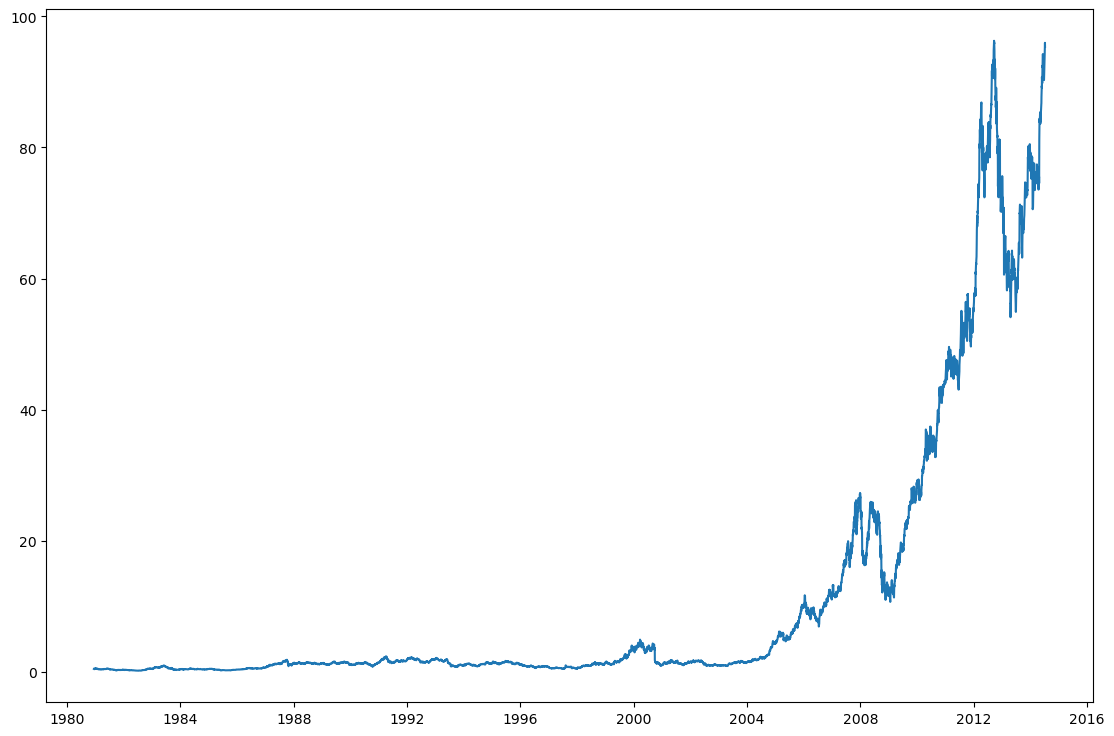

In [171]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple['Adj Close'])
plt.show()

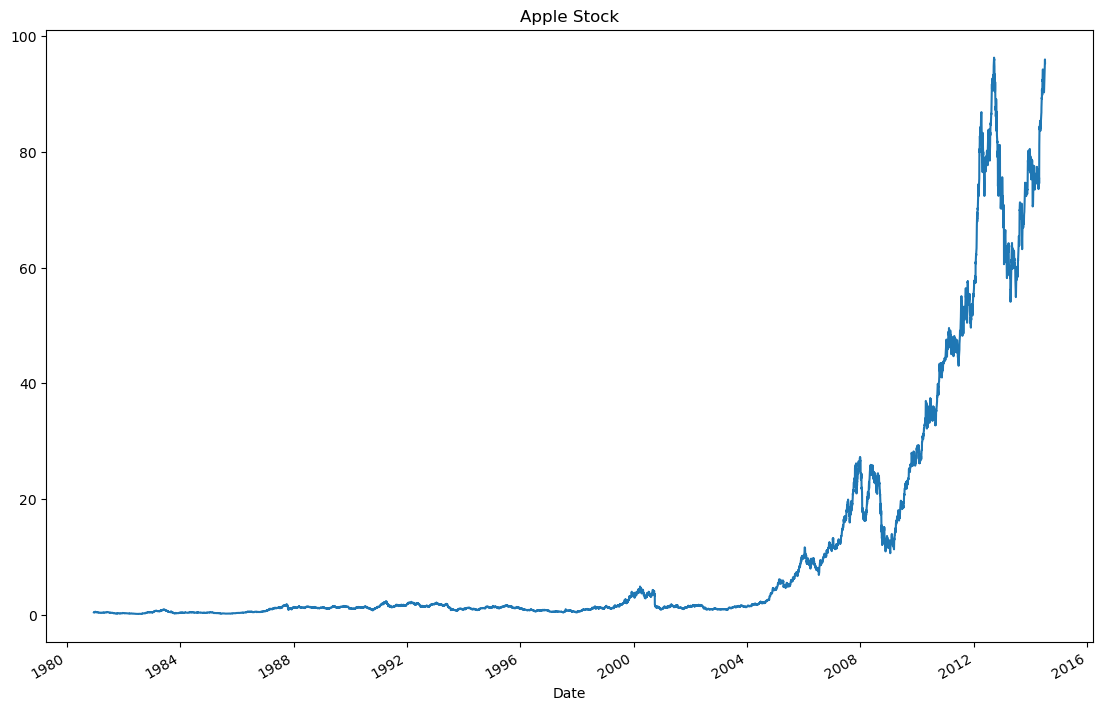

In [172]:
appl_open = apple['Adj Close'].plot(title="Apple Stock")
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

### BONUS: Create your own question and answer it.

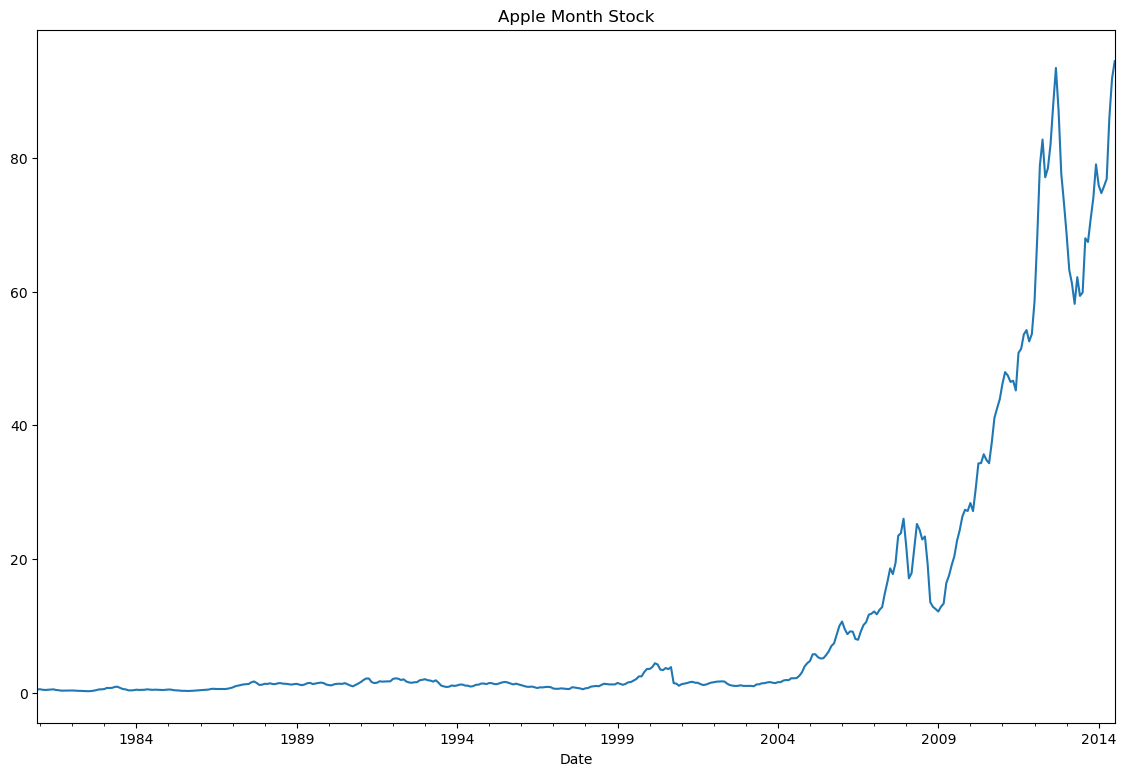

In [178]:
plt.figure(figsize=(13.9, 9))
apple_month['Adj Close'].plot(title="Apple Month Stock")
plt.savefig("apple_stock.png")
plt.show()

In [173]:
# def get_max(numbers):
#   max = numbers[0]
#   for n in numbers:
#     if n > max:
#       max = n
#   return max

# print(get_max([-3, -5, -2]))